# Demonstrating how to plot geolocation data on a worldmap.
This is a simple example on how to plot latitude and longitude data on a world map using pandas dataframes and geopandas to plot the data.

The data is collected hackerbotnets from my cloudcomputer collected from iptables where I block hackerbotnets using fail2ban and then get the geolocation of the ip-numbers using geolocation and some shellscript to get the data into hackersloc.csv.

By Ulf Hellström , oraminute@gmail.com

# Import dataset into a DataFrame

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
df = pd.read_csv("hackersloc.csv")
df

IP               Source                       Country  \
0      101.178.223.39   GeoIP City Edition                     Rev 1: AU   
1      101.231.146.34   GeoIP City Edition                     Rev 1: CN   
2       101.32.178.46   GeoIP City Edition                     Rev 1: CN   
3      101.32.206.243   GeoIP City Edition                     Rev 1: CN   
4       101.32.26.159   GeoIP City Edition                     Rev 1: CN   
5       101.32.29.100   GeoIP City Edition                     Rev 1: CN   
6        101.32.34.76   GeoIP City Edition                     Rev 1: CN   
7        101.32.46.20   GeoIP City Edition                     Rev 1: CN   
8      101.33.117.207   GeoIP City Edition                     Rev 1: CN   
9      101.33.123.210   GeoIP City Edition                     Rev 1: CN   
10     101.69.200.162   GeoIP City Edition                     Rev 1: CN   
11      101.89.219.59   GeoIP City Edition                     Rev 1: CN   
12       103.104.99.2   GeoIP City Edition                     Rev 1: ID   
13    103.105.130.136   GeoIP City Edition                     Rev 1: ID   
14    103.130.195.188   GeoIP City Edition   Rev 1: IP Address not found   
15     103.130.214.48   GeoIP City Edition   Rev 1: IP Address not found   
16      103.140.234.9   GeoIP City Edition   Rev 1: IP Address not found   
17       103.140.66.5   GeoIP City Edition   Rev 1: IP Address not found   
18      103.207.11.10   GeoIP City Edition                     Rev 1: IN   
19       103.207.11.6   GeoIP City Edition                     Rev 1: IN   
20      103.215.236.2   GeoIP City Edition                     Rev 1: IN   
21      103.225.99.36   GeoIP City Edition                     Rev 1: IN   
22    103.237.145.182   GeoIP City Edition                     Rev 1: VN   
23      103.245.181.2   GeoIP City Edition                     Rev 1: ID   
24     103.246.240.26   GeoIP City Edition                     Rev 1: IN   
25      103.249.83.66   GeoIP City Edition                     Rev 1: IN   
26    103.253.200.161   GeoIP City Edition                     Rev 1: IN   
27     103.254.198.67   GeoIP City Edition                     Rev 1: US   
28     103.39.236.213   GeoIP City Edition                     Rev 1: IN   
29      103.40.246.84   GeoIP City Edition                     Rev 1: CN   
30     103.40.248.203   GeoIP City Edition                     Rev 1: CN   
31      103.45.118.92   GeoIP City Edition                     Rev 1: CN   
32     103.45.187.249   GeoIP City Edition                     Rev 1: CN   
33      103.55.38.247   GeoIP City Edition                     Rev 1: ID   
34     103.63.109.166   GeoIP City Edition                     Rev 1: VN   
35      103.75.34.219   GeoIP City Edition                     Rev 1: IN   
36     103.86.134.194   GeoIP City Edition                     Rev 1: PK   
37      103.89.176.74   GeoIP City Edition                     Rev 1: MM   
38       103.91.65.55   GeoIP City Edition                     Rev 1: MY   
39     103.93.180.102   GeoIP City Edition                     Rev 1: CN   
40      103.96.96.114   GeoIP City Edition                     Rev 1: IN   
41     104.131.107.13   GeoIP City Edition                     Rev 1: US   
42     104.131.109.15   GeoIP City Edition                     Rev 1: US   
43     104.131.180.54   GeoIP City Edition                     Rev 1: US   
44    104.131.186.240   GeoIP City Edition                     Rev 1: US   
45     104.131.89.163   GeoIP City Edition                     Rev 1: US   
46       104.137.38.3   GeoIP City Edition                     Rev 1: US   
47     104.154.147.52   GeoIP City Edition                     Rev 1: US   
48    104.156.250.125   GeoIP City Edition                     Rev 1: US   
49     104.159.165.46   GeoIP City Edition                     Rev 1: US   
50     104.194.72.252   GeoIP City Edition                     Rev 1: US   
51     104.199.53.197   GeoIP City Edition                     Rev 

## Removing unecessary columns

In [2]:
df = df.drop(columns=['Source','unknown_1','unknown_2','unknown_3'])
df

IP                       Country State  \
0      101.178.223.39                     Rev 1: AU    02   
1      101.231.146.34                     Rev 1: CN    23   
2       101.32.178.46                     Rev 1: CN    22   
3      101.32.206.243                     Rev 1: CN    22   
4       101.32.26.159                     Rev 1: CN    22   
5       101.32.29.100                     Rev 1: CN    22   
6        101.32.34.76                     Rev 1: CN    22   
7        101.32.46.20                     Rev 1: CN    22   
8      101.33.117.207                     Rev 1: CN    22   
9      101.33.123.210                     Rev 1: CN    22   
10     101.69.200.162                     Rev 1: CN    02   
11      101.89.219.59                     Rev 1: CN    23   
12       103.104.99.2                     Rev 1: ID   N/A   
13    103.105.130.136                     Rev 1: ID    04   
14    103.130.195.188   Rev 1: IP Address not found   NaN   
15     103.130.214.48   Rev 1: IP Address not found   NaN   
16      103.140.234.9   Rev 1: IP Address not found   NaN   
17       103.140.66.5   Rev 1: IP Address not found   NaN   
18      103.207.11.10                     Rev 1: IN    16   
19       103.207.11.6                     Rev 1: IN    16   
20      103.215.236.2                     Rev 1: IN    25   
21      103.225.99.36                     Rev 1: IN   N/A   
22    103.237.145.182                     Rev 1: VN    46   
23      103.245.181.2                     Rev 1: ID    04   
24     103.246.240.26                     Rev 1: IN   N/A   
25      103.249.83.66                     Rev 1: IN    25   
26    103.253.200.161                     Rev 1: IN    10   
27     103.254.198.67                     Rev 1: US   N/A   
28     103.39.236.213                     Rev 1: IN   N/A   
29      103.40.246.84                     Rev 1: CN    30   
30     103.40.248.203                     Rev 1: CN    30   
31      103.45.118.92                     Rev 1: CN    30   
32     103.45.187.249                     Rev 1: CN    30   
33      103.55.38.247                     Rev 1: ID    14   
34     103.63.109.166                     Rev 1: VN    30   
35      103.75.34.219                     Rev 1: IN    36   
36     103.86.134.194                     Rev 1: PK    04   
37      103.89.176.74                     Rev 1: MM    17   
38       103.91.65.55                     Rev 1: MY   N/A   
39     103.93.180.102                     Rev 1: CN    22   
40      103.96.96.114                     Rev 1: IN   N/A   
41     104.131.107.13                     Rev 1: US    NJ   
42     104.131.109.15                     Rev 1: US    NJ   
43     104.131.180.54                     Rev 1: US    NJ   
44    104.131.186.240                     Rev 1: US    NJ   
45     104.131.89.163                     Rev 1: US    NJ   
46       104.137.38.3                     Rev 1: US    AL   
47     104.154.147.52                     Rev 1: US    CA   
48    104.156.250.125                     Rev 1: US    NJ   
49     104.159.165.46                     Rev 1: US    MN   
50     104.194.72.252                     Rev 1: US    CA   
51     104.199.53.197                     Rev 1: EU   N/A   
52    104.211.164.221                     Rev 1: IN    16   
53    104.215.255.222                     Rev 1: SG    00   
54    104.225.153.190                     Rev 1: US    CA   
55    104.236.111.220                     Rev 1: US    NJ   
56    104.236.122.229                     Rev 1: US    NJ   
57    104.236.230.184                     Rev 1: US    NJ   
58        104.236.5.5                     Rev 1: US    NJ   
59     104.236.58.164                     Rev 1: US    NJ   
60     104.236.93.241                     Rev 1: US    NJ   
61    104.248.114.239                     Rev 1: US    DE   
62    104.248.116.140                     Rev 1: US    DE   
63     104.248.133.62                     Rev 1: US    DE   
64     104.248.160.58                     Rev 1: US   

## Remove lines with NaN values e.g "Rev 1: IP Address not found"

We have to cleanup some lines where geoiplookup have no data to determine the location of the ip-number.
This lines we cannot plot to a grap so we have to get rid of them.

In [3]:
# Get indexes where name column has a specific value
indexNames = df[df['Country'] == ' Rev 1: IP Address not found'].index 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df

IP     Country State                     Region  \
0      101.178.223.39   Rev 1: AU    02            New South Wales   
1      101.231.146.34   Rev 1: CN    23                   Shanghai   
2       101.32.178.46   Rev 1: CN    22                    Beijing   
3      101.32.206.243   Rev 1: CN    22                    Beijing   
4       101.32.26.159   Rev 1: CN    22                    Beijing   
5       101.32.29.100   Rev 1: CN    22                    Beijing   
6        101.32.34.76   Rev 1: CN    22                    Beijing   
7        101.32.46.20   Rev 1: CN    22                    Beijing   
8      101.33.117.207   Rev 1: CN    22                    Beijing   
9      101.33.123.210   Rev 1: CN    22                    Beijing   
10     101.69.200.162   Rev 1: CN    02                   Zhejiang   
11      101.89.219.59   Rev 1: CN    23                   Shanghai   
12       103.104.99.2   Rev 1: ID   N/A                        N/A   
13    103.105.130.136   Rev 1: ID    04               Jakarta Raya   
18      103.207.11.10   Rev 1: IN    16                Maharashtra   
19       103.207.11.6   Rev 1: IN    16                Maharashtra   
20      103.215.236.2   Rev 1: IN    25                 Tamil Nadu   
21      103.225.99.36   Rev 1: IN   N/A                        N/A   
22    103.237.145.182   Rev 1: VN    46                  Binh Dinh   
23      103.245.181.2   Rev 1: ID    04               Jakarta Raya   
24     103.246.240.26   Rev 1: IN   N/A                        N/A   
25      103.249.83.66   Rev 1: IN    25                 Tamil Nadu   
26    103.253.200.161   Rev 1: IN    10                    Haryana   
27     103.254.198.67   Rev 1: US   N/A                        N/A   
28     103.39.236.213   Rev 1: IN   N/A                        N/A   
29      103.40.246.84   Rev 1: CN    30                  Guangdong   
30     103.40.248.203   Rev 1: CN    30                  Guangdong   
31      103.45.118.92   Rev 1: CN    30                  Guangdong   
32     103.45.187.249   Rev 1: CN    30                  Guangdong   
33      103.55.38.247   Rev 1: ID    14           Kalimantan Timur   
34     103.63.109.166   Rev 1: VN    30                 Quang Ninh   
35      103.75.34.219   Rev 1: IN    36              Uttar Pradesh   
36     103.86.134.194   Rev 1: PK    04                     Punjab   
37      103.89.176.74   Rev 1: MM    17                     Yangon   
38       103.91.65.55   Rev 1: MY   N/A                        N/A   
39     103.93.180.102   Rev 1: CN    22                    Beijing   
40      103.96.96.114   Rev 1: IN   N/A                        N/A   
41     104.131.107.13   Rev 1: US    NJ                 New Jersey   
42     104.131.109.15   Rev 1: US    NJ                 New Jersey   
43     104.131.180.54   Rev 1: US    NJ                 New Jersey   
44    104.131.186.240   Rev 1: US    NJ                 New Jersey   
45     104.131.89.163   Rev 1: US    NJ                 New Jersey   
46       104.137.38.3   Rev 1: US    AL                    Alabama   
47     104.154.147.52   Rev 1: US    CA                 California   
48    104.156.250.125   Rev 1: US    NJ                 New Jersey   
49     104.159.165.46   Rev 1: US    MN                  Minnesota   
50     104.194.72.252   Rev 1: US    CA                 California   
51     104.199.53.197   Rev 1: EU   N/A                        N/A   
52    104.211.164.221   Rev 1: IN    16                Maharashtra   
53    104.215.255.222   Rev 1: SG    00                        N/A   
54    104.225.153.190   Rev 1: US    CA                 California   
55    104.236.111.220   Rev 1: US    NJ                 New Jersey   
56    104.236.122.229   Rev 1: US    NJ                 New Jersey   
57    104.236.230.184   Rev 1: US    NJ                 New Jersey   
58        104.236.5.5   Rev 1: US    NJ                 New Jersey   
59     104.236.58.164   Rev 1: US    NJ                 New Jersey   
60     104.236.93.241   Rev 1

## Cleanup Country further by removing "Rev 1:" and only keep the countrycode.

We woudl like to get the Countrynames from the Alpha2Code -> country code. To be able to do that we need to cleanup some extra output that geoiplookup gives us so we get a clean Alpha2code like AU for Australia.
We also make sure that we can join the data by triming all spaces away from the Country code so we have "AU" and not like " AU" or "AU " that we might not be able to join with any other dataframe sets.

In [4]:
df = df.replace(' Rev 1:','', regex=True)
df['Country'] = df['Country'].str.strip()
df

IP Country State                     Region  \
0      101.178.223.39      AU    02            New South Wales   
1      101.231.146.34      CN    23                   Shanghai   
2       101.32.178.46      CN    22                    Beijing   
3      101.32.206.243      CN    22                    Beijing   
4       101.32.26.159      CN    22                    Beijing   
5       101.32.29.100      CN    22                    Beijing   
6        101.32.34.76      CN    22                    Beijing   
7        101.32.46.20      CN    22                    Beijing   
8      101.33.117.207      CN    22                    Beijing   
9      101.33.123.210      CN    22                    Beijing   
10     101.69.200.162      CN    02                   Zhejiang   
11      101.89.219.59      CN    23                   Shanghai   
12       103.104.99.2      ID   N/A                        N/A   
13    103.105.130.136      ID    04               Jakarta Raya   
18      103.207.11.10      IN    16                Maharashtra   
19       103.207.11.6      IN    16                Maharashtra   
20      103.215.236.2      IN    25                 Tamil Nadu   
21      103.225.99.36      IN   N/A                        N/A   
22    103.237.145.182      VN    46                  Binh Dinh   
23      103.245.181.2      ID    04               Jakarta Raya   
24     103.246.240.26      IN   N/A                        N/A   
25      103.249.83.66      IN    25                 Tamil Nadu   
26    103.253.200.161      IN    10                    Haryana   
27     103.254.198.67      US   N/A                        N/A   
28     103.39.236.213      IN   N/A                        N/A   
29      103.40.246.84      CN    30                  Guangdong   
30     103.40.248.203      CN    30                  Guangdong   
31      103.45.118.92      CN    30                  Guangdong   
32     103.45.187.249      CN    30                  Guangdong   
33      103.55.38.247      ID    14           Kalimantan Timur   
34     103.63.109.166      VN    30                 Quang Ninh   
35      103.75.34.219      IN    36              Uttar Pradesh   
36     103.86.134.194      PK    04                     Punjab   
37      103.89.176.74      MM    17                     Yangon   
38       103.91.65.55      MY   N/A                        N/A   
39     103.93.180.102      CN    22                    Beijing   
40      103.96.96.114      IN   N/A                        N/A   
41     104.131.107.13      US    NJ                 New Jersey   
42     104.131.109.15      US    NJ                 New Jersey   
43     104.131.180.54      US    NJ                 New Jersey   
44    104.131.186.240      US    NJ                 New Jersey   
45     104.131.89.163      US    NJ                 New Jersey   
46       104.137.38.3      US    AL                    Alabama   
47     104.154.147.52      US    CA                 California   
48    104.156.250.125      US    NJ                 New Jersey   
49     104.159.165.46      US    MN                  Minnesota   
50     104.194.72.252      US    CA                 California   
51     104.199.53.197      EU   N/A                        N/A   
52    104.211.164.221      IN    16                Maharashtra   
53    104.215.255.222      SG    00                        N/A   
54    104.225.153.190      US    CA                 California   
55    104.236.111.220      US    NJ                 New Jersey   
56    104.236.122.229      US    NJ                 New Jersey   
57    104.236.230.184      US    NJ                 New Jersey   
58        104.236.5.5      US    NJ                 New Jersey   
59     104.236.58.164      US    NJ                 New Jersey   
60     104.236.93.241      US    NJ                 New Jersey   
61    104.248.114.239      US    DE                   Delaware   
62    104.248.116.140      US    DE                   Delaware   
63     104.248.133.62      US    DE                   Delaw

## Rename column Country to Alpha2Code
In this step we prepare to join this dataframe set of data with another dataframe set where we join on Alpha2Code. To make this join simple we want to use the same columnname in both datasets.

In [5]:
df.rename(columns = {'Country':'Alpha2Code'}, inplace = True) 
df

IP Alpha2Code State                     Region  \
0      101.178.223.39         AU    02            New South Wales   
1      101.231.146.34         CN    23                   Shanghai   
2       101.32.178.46         CN    22                    Beijing   
3      101.32.206.243         CN    22                    Beijing   
4       101.32.26.159         CN    22                    Beijing   
5       101.32.29.100         CN    22                    Beijing   
6        101.32.34.76         CN    22                    Beijing   
7        101.32.46.20         CN    22                    Beijing   
8      101.33.117.207         CN    22                    Beijing   
9      101.33.123.210         CN    22                    Beijing   
10     101.69.200.162         CN    02                   Zhejiang   
11      101.89.219.59         CN    23                   Shanghai   
12       103.104.99.2         ID   N/A                        N/A   
13    103.105.130.136         ID    04               Jakarta Raya   
18      103.207.11.10         IN    16                Maharashtra   
19       103.207.11.6         IN    16                Maharashtra   
20      103.215.236.2         IN    25                 Tamil Nadu   
21      103.225.99.36         IN   N/A                        N/A   
22    103.237.145.182         VN    46                  Binh Dinh   
23      103.245.181.2         ID    04               Jakarta Raya   
24     103.246.240.26         IN   N/A                        N/A   
25      103.249.83.66         IN    25                 Tamil Nadu   
26    103.253.200.161         IN    10                    Haryana   
27     103.254.198.67         US   N/A                        N/A   
28     103.39.236.213         IN   N/A                        N/A   
29      103.40.246.84         CN    30                  Guangdong   
30     103.40.248.203         CN    30                  Guangdong   
31      103.45.118.92         CN    30                  Guangdong   
32     103.45.187.249         CN    30                  Guangdong   
33      103.55.38.247         ID    14           Kalimantan Timur   
34     103.63.109.166         VN    30                 Quang Ninh   
35      103.75.34.219         IN    36              Uttar Pradesh   
36     103.86.134.194         PK    04                     Punjab   
37      103.89.176.74         MM    17                     Yangon   
38       103.91.65.55         MY   N/A                        N/A   
39     103.93.180.102         CN    22                    Beijing   
40      103.96.96.114         IN   N/A                        N/A   
41     104.131.107.13         US    NJ                 New Jersey   
42     104.131.109.15         US    NJ                 New Jersey   
43     104.131.180.54         US    NJ                 New Jersey   
44    104.131.186.240         US    NJ                 New Jersey   
45     104.131.89.163         US    NJ                 New Jersey   
46       104.137.38.3         US    AL                    Alabama   
47     104.154.147.52         US    CA                 California   
48    104.156.250.125         US    NJ                 New Jersey   
49     104.159.165.46         US    MN                  Minnesota   
50     104.194.72.252         US    CA                 California   
51     104.199.53.197         EU   N/A                        N/A   
52    104.211.164.221         IN    16                Maharashtra   
53    104.215.255.222         SG    00                        N/A   
54    104.225.153.190         US    CA                 California   
55    104.236.111.220         US    NJ                 New Jersey   
56    104.236.122.229         US    NJ                 New Jersey   
57    104.236.230.184         US    NJ                 New Jersey   
58        104.236.5.5         US    NJ                 New Jersey   
59     104.236.58.164         US    NJ                 New Jersey   
60     104.236.93.241         US    NJ                 New Jersey   
61    104.248.114

## Read new DataFrame with Countrynames

Here we read in the other dataframe set of data with Alpha2Code's and the real countrynames downloaded from interwebs. We also cleanup the Alpha2Code by Triming away all space chars that might be in that string just like
we did with the dataset from the cloud computer.

In [6]:
countrynames = pd.read_csv("countrycode.csv")
countrynames['Alpha2Code'] = countrynames['Alpha2Code'].str.strip()
countrynames

Countryname Alpha2Code
0                                          Afghanistan         AF
1                                              Albania         AL
2                                              Algeria         DZ
3                                       American Samoa         AS
4                                              Andorra         AD
5                                               Angola         AO
6                                             Anguilla         AI
7                                           Antarctica         AQ
8                                  Antigua and Barbuda         AG
9                                            Argentina         AR
10                                             Armenia         AM
11                                               Aruba         AW
12                                           Australia         AU
13                                             Austria         AT
14                                          Azerbaijan         AZ
15                                             Bahamas         BS
16                                             Bahrain         BH
17                                          Bangladesh         BD
18                                            Barbados         BB
19                                             Belarus         BY
20                                             Belgium         BE
21                                              Belize         BZ
22                                               Benin         BJ
23                                             Bermuda         BM
24                                              Bhutan         BT
25                    Bolivia (Plurinational State of)         BO
26                     Bonaire Sint Eustatius and Saba         BQ
27                              Bosnia and Herzegovina         BA
28                                            Botswana         BW
29                                       Bouvet Island         BV
30                                              Brazil         BR
31                      British Indian Ocean Territory         IO
32                                   Brunei Darussalam         BN
33                                            Bulgaria         BG
34                                        Burkina Faso         BF
35                                             Burundi         BI
36                                          Cabo Verde         CV
37                                            Cambodia         KH
38                                            Cameroon         CM
39                                              Canada         CA
40                                      Cayman Islands         KY
41                            Central African Republic         CF
42                                                Chad         TD
43                                               Chile         CL
44                                               China         CN
45                                    Christmas Island         CX
46                             Cocos (Keeling) Islands         CC
47                                            Colombia         CO
48                                             Comoros         KM
49                                               Congo         CG
50                  Congo (Democratic Republic of the)         CD
51                                        Cook Islands         CK
52                                          Costa Rica         CR
53                                       Côte d'Ivoire         CI
54                                             Croatia         HR
55                                                Cuba         CU
56                                             Curaçao         CW
57                                              Cyprus         CY
58                                             Czechia         CZ
59                                             Denmark         DK
60               

## Merge both dataframes into a new dataframes with countrynames added

With both datasets in place in pandas dataframe we can do like SQL LEFT OUTER JOIN. We use the merge command in pandas do generate a new dataframeset that combines the results from both dataframs and add Countryname to our
new "hackers" resultset that we then can generate a graph on.

In [7]:
hackers = pd.merge(df,countrynames,how='left',on='Alpha2Code')
hackers

IP Alpha2Code State                     Region  \
0      101.178.223.39         AU    02            New South Wales   
1      101.231.146.34         CN    23                   Shanghai   
2       101.32.178.46         CN    22                    Beijing   
3      101.32.206.243         CN    22                    Beijing   
4       101.32.26.159         CN    22                    Beijing   
5       101.32.29.100         CN    22                    Beijing   
6        101.32.34.76         CN    22                    Beijing   
7        101.32.46.20         CN    22                    Beijing   
8      101.33.117.207         CN    22                    Beijing   
9      101.33.123.210         CN    22                    Beijing   
10     101.69.200.162         CN    02                   Zhejiang   
11      101.89.219.59         CN    23                   Shanghai   
12       103.104.99.2         ID   N/A                        N/A   
13    103.105.130.136         ID    04               Jakarta Raya   
14      103.207.11.10         IN    16                Maharashtra   
15       103.207.11.6         IN    16                Maharashtra   
16      103.215.236.2         IN    25                 Tamil Nadu   
17      103.225.99.36         IN   N/A                        N/A   
18    103.237.145.182         VN    46                  Binh Dinh   
19      103.245.181.2         ID    04               Jakarta Raya   
20     103.246.240.26         IN   N/A                        N/A   
21      103.249.83.66         IN    25                 Tamil Nadu   
22    103.253.200.161         IN    10                    Haryana   
23     103.254.198.67         US   N/A                        N/A   
24     103.39.236.213         IN   N/A                        N/A   
25      103.40.246.84         CN    30                  Guangdong   
26     103.40.248.203         CN    30                  Guangdong   
27      103.45.118.92         CN    30                  Guangdong   
28     103.45.187.249         CN    30                  Guangdong   
29      103.55.38.247         ID    14           Kalimantan Timur   
30     103.63.109.166         VN    30                 Quang Ninh   
31      103.75.34.219         IN    36              Uttar Pradesh   
32     103.86.134.194         PK    04                     Punjab   
33      103.89.176.74         MM    17                     Yangon   
34       103.91.65.55         MY   N/A                        N/A   
35     103.93.180.102         CN    22                    Beijing   
36      103.96.96.114         IN   N/A                        N/A   
37     104.131.107.13         US    NJ                 New Jersey   
38     104.131.109.15         US    NJ                 New Jersey   
39     104.131.180.54         US    NJ                 New Jersey   
40    104.131.186.240         US    NJ                 New Jersey   
41     104.131.89.163         US    NJ                 New Jersey   
42       104.137.38.3         US    AL                    Alabama   
43     104.154.147.52         US    CA                 California   
44    104.156.250.125         US    NJ                 New Jersey   
45     104.159.165.46         US    MN                  Minnesota   
46     104.194.72.252         US    CA                 California   
47     104.199.53.197         EU   N/A                        N/A   
48    104.211.164.221         IN    16                Maharashtra   
49    104.215.255.222         SG    00                        N/A   
50    104.225.153.190         US    CA                 California   
51    104.236.111.220         US    NJ                 New Jersey   
52    104.236.122.229         US    NJ                 New Jersey   
53    104.236.230.184         US    NJ                 New Jersey   
54        104.236.5.5         US    NJ                 New Jersey   
55     104.236.58.164         US    NJ                 New Jersey   
56     104.236.93.241         US    NJ                 New Jersey   
57    104.248.114

## Plot Hackerbotnets on a worldmap with GeoPandas.

So now let's use GeoPandas to read in a low-resolution map of the world.
We also need shapely since we need to convert the longitude on our X-axis and Latitude on our Y-axis
to plot objects that is used by Geopandas. We also resize the map to get a better visual style before
we plot the whole dataset.

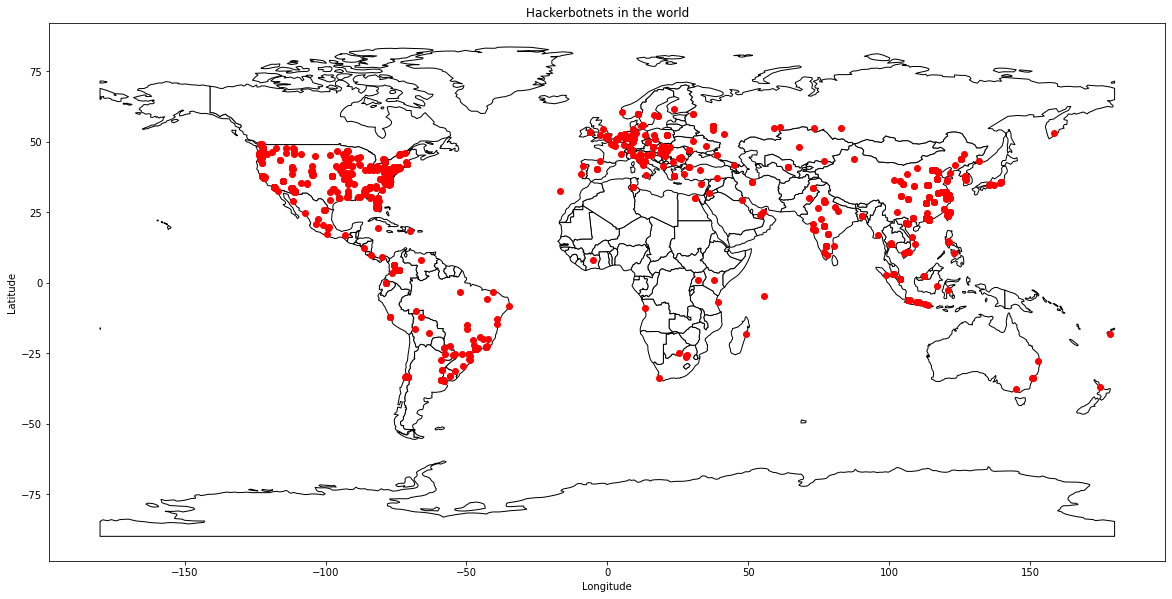

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point,Polygon

# Convert latitude and longitude to plot objects
gdf = gpd.GeoDataFrame(hackers, geometry=gpd.points_from_xy(hackers.Longitude, hackers.Latitude))

# Read in a worldmap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set the dimension of the map
ax = world.plot(color='white',edgecolor='black',figsize=(20,15))

# We can now plot our ``GeoDataFrame``.
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title('Hackerbotnets in the world')
gdf.plot(ax=ax, color='red')
plt.show()